In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy.signal import butter, filtfilt

In [2]:
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

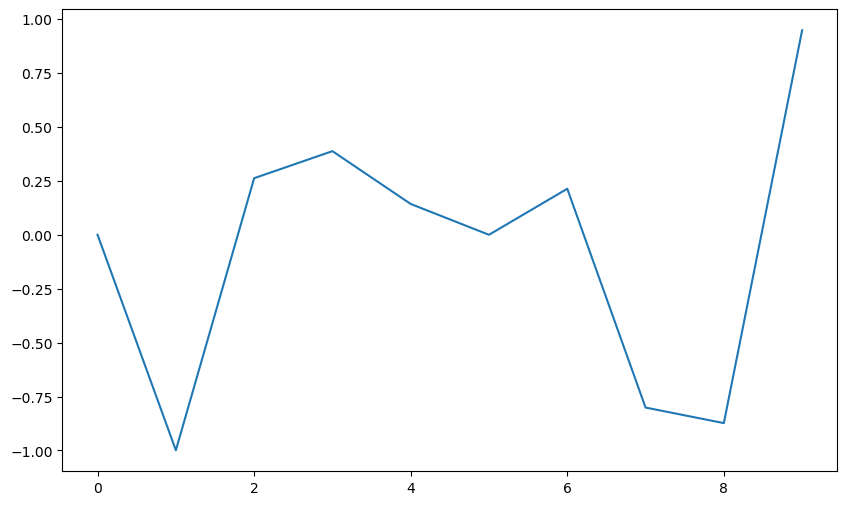

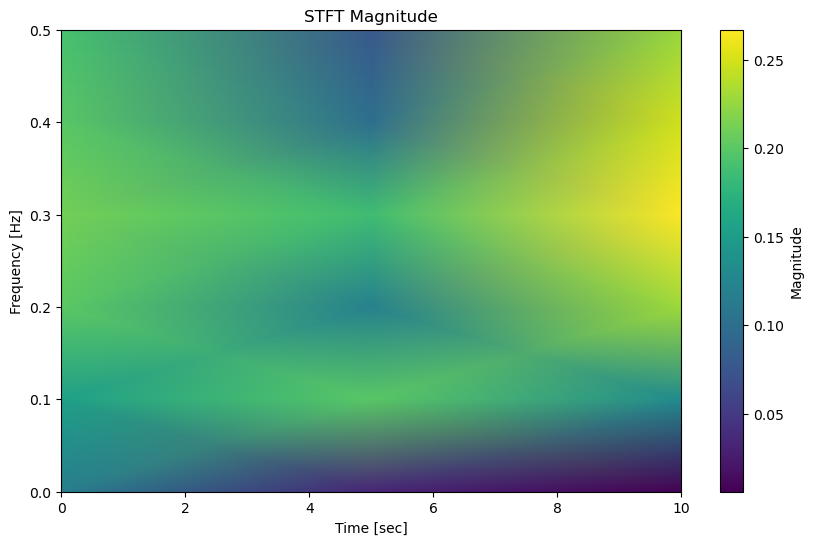

In [3]:
fs = 1  # Sampling frequency
t = np.linspace(0, 10, fs * 10, endpoint=False)
x = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 20 * t * np.sin(2 * np.pi * 0.1 * t))

plt.figure(figsize=(10, 6))
plt.plot(t, x)
plt.show()

f, t_stft, Zxx = stft(x, fs=fs, nperseg=10)

plt.figure(figsize=(10, 6))
plt.pcolormesh(t_stft, f, np.abs(Zxx), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
#plt.ylim([0, 50])
plt.colorbar(label='Magnitude')
plt.show()

Text(0.5, 0, 'Time [sec]')

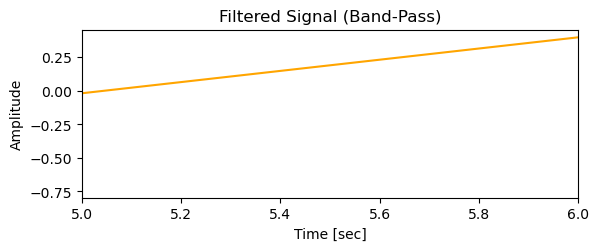

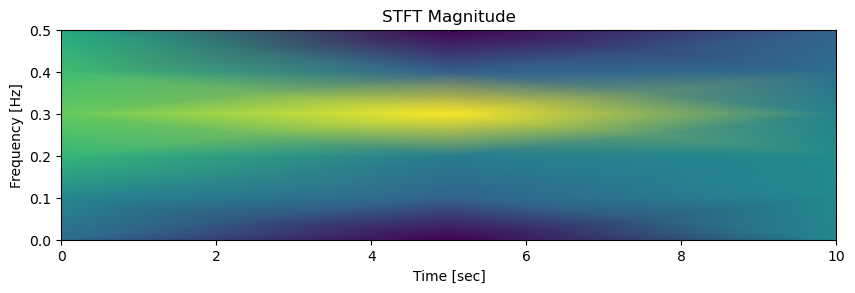

In [4]:
lowcut = 0.2  # Lower frequency bound (in Hz)
highcut = 0.4  # Upper frequency bound (in Hz)
order = 1 # Filter order

filtered_signal = bandpass_filter(x, lowcut, highcut, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal, label='Filtered Signal', color='orange')
plt.title('Filtered Signal (Band-Pass)')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.xlim([5,6])

f, t_stft, Zxx = stft(filtered_signal, fs=fs, nperseg=10)
magnitude = np.abs(Zxx)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.pcolormesh(t_stft, f, magnitude, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
#plt.ylim([0, 200])

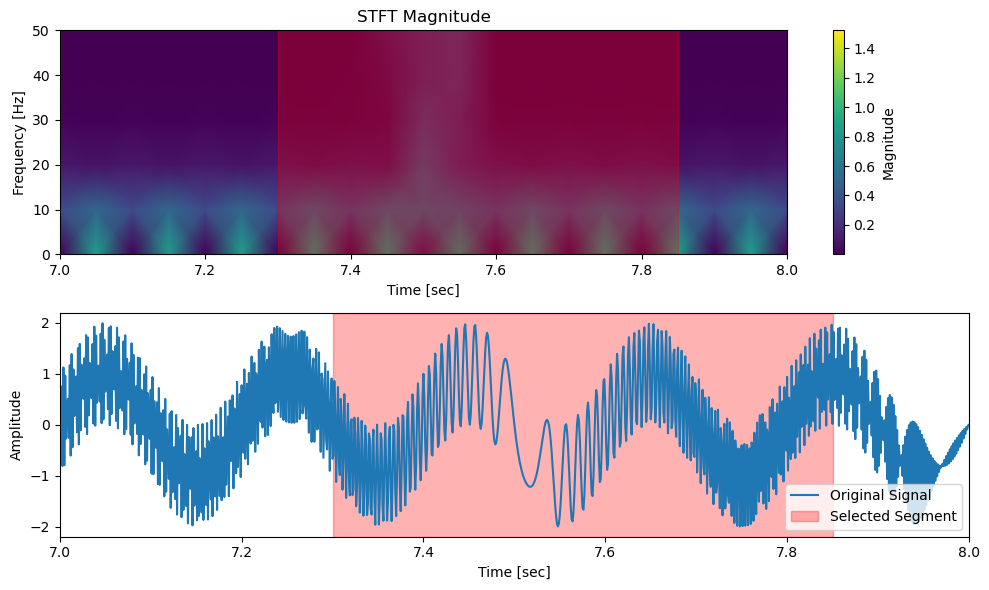

In [6]:
fs = 1000  # Sampling frequency
t = np.linspace(0, 10, fs * 10, endpoint=False)
x = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 20 * t * np.sin(2 * np.pi * 0.5 * t))

f, t_stft, Zxx = stft(x, fs=fs, nperseg=100)

magnitude = np.abs(Zxx)

dominant_freqs = f[np.argmax(magnitude, axis=0)]

frequency_variation_threshold = 10  # Hz

constant_period_indices = []
current_segment = []

for i in range(1, len(dominant_freqs)):
    if abs(dominant_freqs[i] - dominant_freqs[i-1]) <= frequency_variation_threshold:
        current_segment.append(i)
    else:
        if current_segment:
            constant_period_indices.append(current_segment)
            current_segment = []
if current_segment:
    constant_period_indices.append(current_segment)

longest_segment = max(constant_period_indices, key=len)

start_time = t_stft[longest_segment[0]]
end_time = t_stft[longest_segment[-1]]

start_idx = int(start_time * fs)
end_idx = int(end_time * fs)

constant_period_segment = x[start_idx:end_idx]

segment_array = np.array(constant_period_segment)

# Plot the results
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.pcolormesh(t_stft, f, magnitude, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([0, 50])
plt.xlim([7,8])
plt.colorbar(label='Magnitude')
plt.axvspan(start_time, end_time, color='red', alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(t, x, label='Original Signal')
plt.axvspan(start_time, end_time, color='red', alpha=0.3, label='Selected Segment')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.xlim([7,8])
plt.legend()

plt.tight_layout()
plt.show()

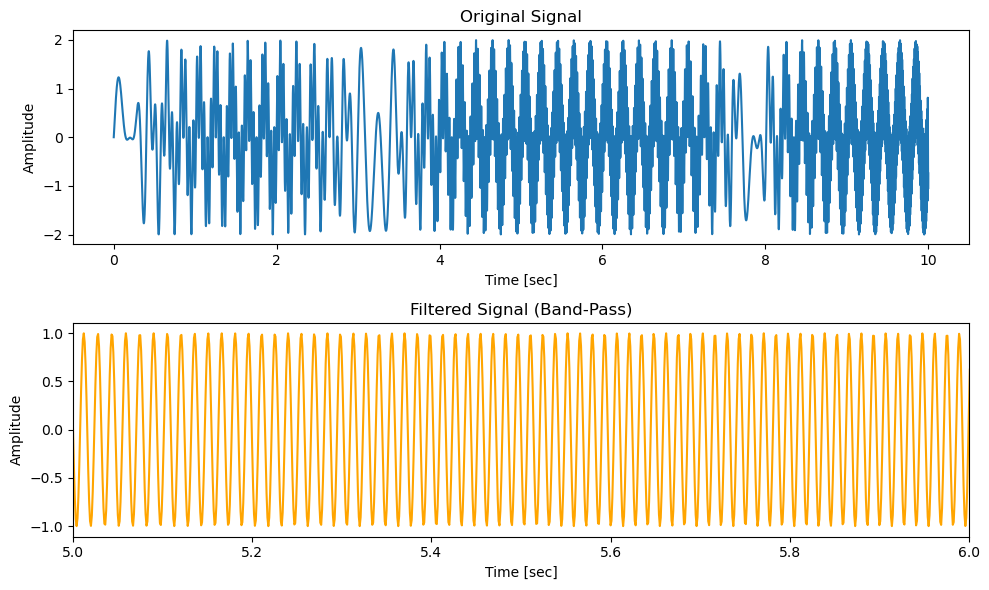

In [7]:
fs = 1000  
t = np.linspace(0, 10, fs * 10, endpoint=False)
x = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 20 * t * np.sin(2 * np.pi * 0.1 * t))

lowcut = 50.0  # Lower frequency bound (in Hz)
highcut = 100.0  # Upper frequency bound (in Hz)
order = 4  # Filter order

filtered_signal = bandpass_filter(x, lowcut, highcut, fs, order)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, x, label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal, label='Filtered Signal', color='orange')
plt.title('Filtered Signal (Band-Pass)')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.xlim([5,6])

plt.tight_layout()
plt.show()

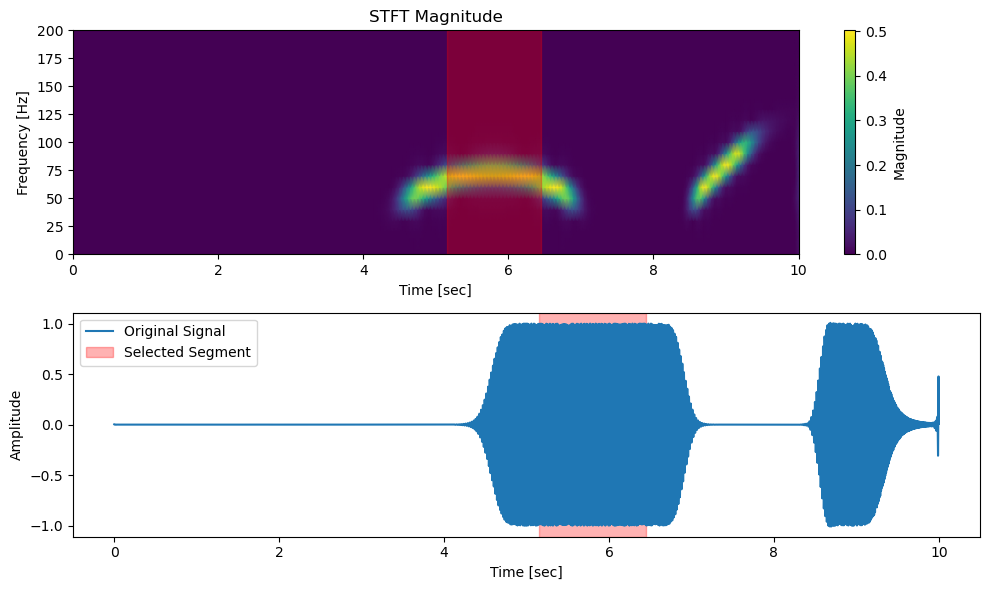

In [8]:
f, t_stft, Zxx = stft(filtered_signal, fs=fs, nperseg=100)

magnitude = np.abs(Zxx)

dominant_freqs = f[np.argmax(magnitude, axis=0)]

frequency_variation_threshold = 1  # Hz


constant_period_indices = []
current_segment = []

for i in range(1, len(dominant_freqs)):
    if abs(dominant_freqs[i] - dominant_freqs[i-1]) <= frequency_variation_threshold:
        current_segment.append(i)
    else:
        if current_segment:
            constant_period_indices.append(current_segment)
            current_segment = []
if current_segment:
    constant_period_indices.append(current_segment)

longest_segment = max(constant_period_indices, key=len)

start_time = t_stft[longest_segment[0]]
end_time = t_stft[longest_segment[-1]]

start_idx = int(start_time * fs)
end_idx = int(end_time * fs)

constant_period_segment = x[start_idx:end_idx]

segment_array = np.array(constant_period_segment)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.pcolormesh(t_stft, f, magnitude, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([0, 200])
#plt.xlim([5,7])
plt.colorbar(label='Magnitude')
plt.axvspan(start_time, end_time, color='red', alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal, label='Original Signal')
plt.axvspan(start_time, end_time, color='red', alpha=0.3, label='Selected Segment')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
#plt.xlim([5,7])
plt.legend()

plt.tight_layout()
plt.show()